## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [75]:
# Checking the number of mice.
combined_data_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df.sort_values("Mouse ID", inplace = True) 
duplicate_data=combined_data_df[combined_data_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_data.count()

Mouse ID              5
Timepoint             5
Tumor Volume (mm3)    5
Metastatic Sites      5
Drug Regimen          5
Sex                   5
Age_months            5
Weight (g)            5
dtype: int64

In [77]:
#Remove duplicates
cleaned_mice_df=combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [78]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_stats = cleaned_mice_df.groupby('Drug Regimen').agg(\
        tumor_volume_mean=('Tumor Volume (mm3)', np.mean),\
        tumore_volume_median=('Tumor Volume (mm3)', np.median),\
        tumor_volume_variance=('Tumor Volume (mm3)', np.var),\
        tumor_volume_Stdev=('Tumor Volume (mm3)', np.std),\
        tumor_volume_SEM=('Tumor Volume (mm3)', st.sem)\
)

drug_regimen_stats

,tumor_volume_mean,tumore_volume_median,tumor_volume_variance,tumor_volume_Stdev,tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.381381,50.909965,43.182399,6.571332,0.526128
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

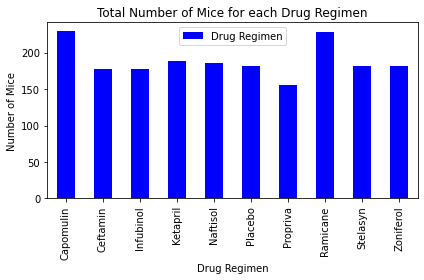

In [81]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_regimen_group= cleaned_mice_df.groupby('Drug Regimen')
regimen_group_count= pd.DataFrame(drug_regimen_group['Drug Regimen'].count())

pd_bar_chart= regimen_group_count.plot(kind='bar', title="Total Number of Mice for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
pd_bar_chart.set_xlabel("Drug Regimen")
pd_bar_chart.set_ylabel("Number of Mice")
plt.tight_layout()

plt.show()

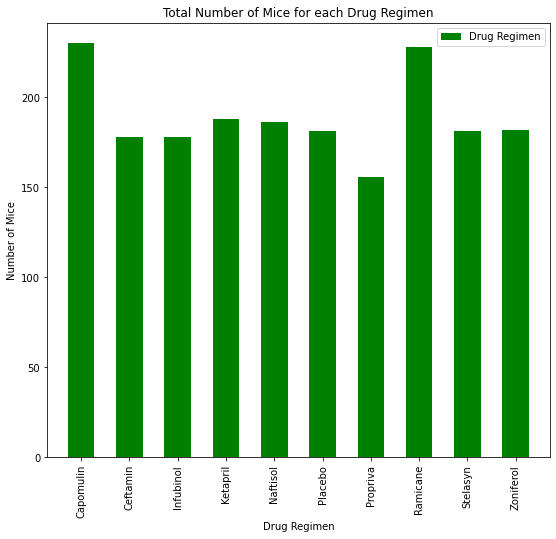

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(regimen_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, regimen_group_count["Drug Regimen"], color='green', align="center", width = 0.55)
plt.xticks(tick_locations, list(regimen_group_count.index), rotation="vertical")

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(regimen_group_count["Drug Regimen"])*1.05)

plt.title("Total Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.show()

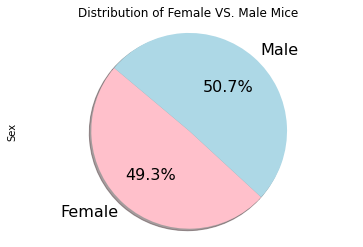

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group= cleaned_mice_df.groupby('Sex')
gender_group_count= pd.DataFrame(gender_group['Sex'].count())

gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of Female VS. Male Mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["pink","lightblue"],legend =False)
plt.axis("equal")
plt.show()

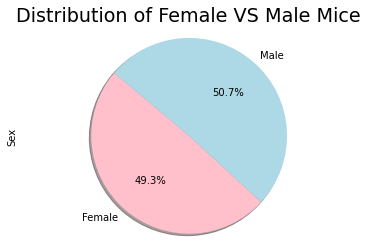

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_label= list(gender_group_count.index.values)
gender_pyplot_count= gender_group_count['Sex']

colors= ["pink", "lightblue"]

plt.pie(gender_pyplot_count, labels=gender_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of Female VS Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimen_summary= cleaned_mice_df[cleaned_mice_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimen_summary= regimen_summary.sort_values(["Timepoint"], ascending=True)

regimen_summary_df= regimen_summary[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimen_summary_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
270,Infubinol,z581,0,45.000000
1745,Capomulin,u364,0,45.000000
585,Ramicane,u196,0,45.000000
1401,Ceftamin,u153,0,45.000000
627,Ramicane,e662,0,45.000000
...,...,...,...,...
480,Ramicane,a444,45,43.047543
584,Ramicane,a520,45,38.810366
1326,Ceftamin,l733,45,64.299830
1834,Capomulin,g288,45,37.074024


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [93]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


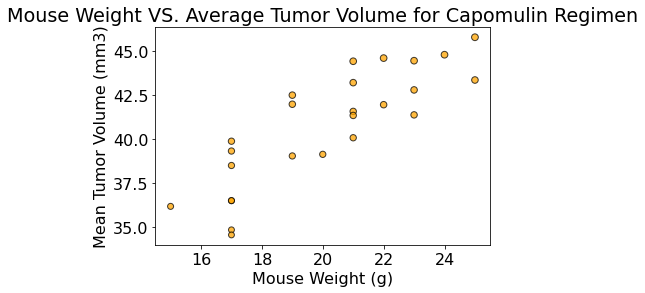

In [97]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data= cleaned_mice_df.loc[cleaned_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse_id= capomulin_data.groupby(['Mouse ID']).agg(\
        mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        ctumor_volume_mean=('Tumor Volume (mm3)', np.mean)\
)

plt.scatter(
    capomulin_mouse_id['mouse_weight'],
    capomulin_mouse_id['ctumor_volume_mean'],
    marker='o',
    facecolors='orange',
    edgecolors='black',
    s=capomulin_mouse_id['ctumor_volume_mean'],
    alpha=.75)

plt.title("Mouse Weight VS. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_mouse_id['mouse_weight'],capomulin_mouse_id['ctumor_volume_mean'])
print(f"The correlation between mouse weight and average tumor volume for Capomulin regimen is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume for Capomulin regimen is 0.84


In [122]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.

import sklearn
from sklearn.linear_model import LinearRegression

x_values= capomulin_mouse_id['mouse_weight']
y_values= capomulin_mouse_id['ctumor_volume_mean']

(slope, intercept, rvalue, pvalue, stderr)= linear_model(x_values, y_values)
linear_equation= x_values * slope + intercept

linear_model.LinearRegression()

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Mouse Weight VS. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")


TypeError: 'module' object is not callable